# Business Understanding

If a new pharmaceutical company wants to break into the industry, they need to know which health condition's drug they need to invest in. They can use the review of drugs to predict the condition of patient. Once they know the condition of patient which are more popular, they can make decision of investing in making drugs of the most popular conditions. Drug reviews are easily accessible on the web.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [2]:
train = pd.read_csv("drugsComTrain_raw.csv", parse_dates=["date"])
test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"])

In [3]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [4]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4


In [5]:
train.shape

(161297, 7)

In [6]:
test.shape

(53766, 7)

In [7]:
train.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
test.isna().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
data = pd.concat([train,test])

In [10]:
data.shape

(215063, 7)

In [11]:
data.describe

<bound method NDFrame.describe of        uniqueID                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
53761    159999                 Tamoxifen     Breast Cancer, Prevention   
53762    140714              Escitalopram                       Anxiety   
53763    130945            Levonorgestrel                 Birth Control   
53764     47656                Tapentadol                          Pain   
53765    113712                 Arthrotec                      Sciatica   

                                                  review  rating 

Source of this Dataset: https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018 \
This dataset contains 215063 rows and 7 columns. \
7 features are: uniqueID, drugName, condition, review, rating, date, usefulCount \
Target feature: condition
   

# Data Preparation

## Data Cleaning

In [12]:
data.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [13]:
percent_missing = (data.isnull().sum() * 100 / len(data))
percent_missing

uniqueID       0.000000
drugName       0.000000
condition      0.555186
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

"condition" feature has 0.5% missing values.

In [14]:
data_clean = data.dropna(how= "any", axis = 0)
data_clean.shape

(213869, 7)

All missing values of "condition" feature have been removed. 

## Exploratory Data Analysis

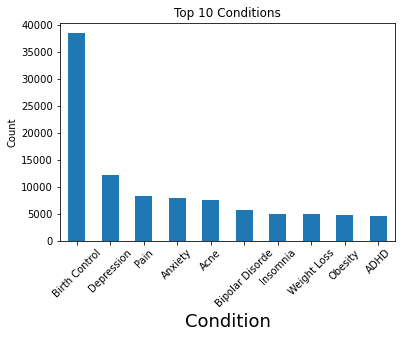

In [26]:
data_clean["condition"].value_counts().head(10).plot.bar()
plt.title("Top 10 Conditions")
plt.xlabel("Condition", fontsize = 18)
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.show();

"Birth Control" is the most common condition.

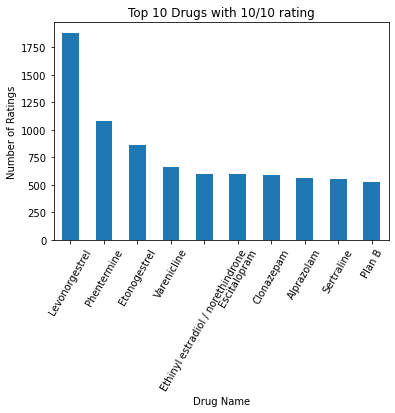

In [27]:
data_clean.loc[data_clean.rating == 10, "drugName"].value_counts().nlargest(10).plot.bar()
plt.title("Top 10 Drugs with 10/10 rating")
plt.xlabel("Drug Name")
plt.xticks(rotation = 60)
plt.ylabel("Number of Ratings")
plt.show();

Levonorgestrel is the top rated drugs with highest number of rating.

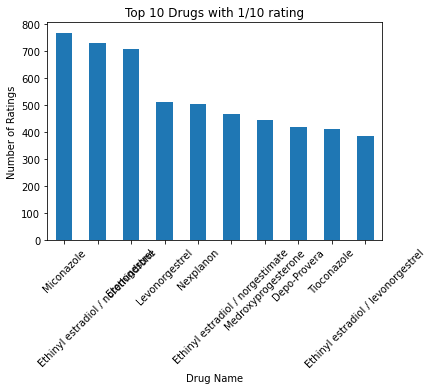

In [28]:
data_clean.loc[data_clean.rating == 1, "drugName"].value_counts().nlargest(10).plot.bar()
plt.title("Top 10 Drugs with 1/10 rating")
plt.xlabel("Drug Name")
plt.xticks(rotation = 45)
plt.ylabel("Number of Ratings")
plt.show();

"Miconazole" is the lowest rated drugs

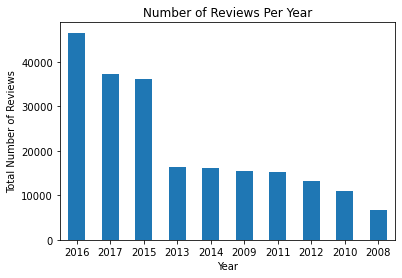

In [31]:
data_clean['date'].dt.year.value_counts().nlargest(10).plot.bar()
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.xticks(rotation = 360)
plt.ylabel("Total Number of Reviews")
plt.show();

2016 has the most number of reviews.

In [19]:
data_clean.groupby('condition')['drugName'].nunique().nlargest(10)

condition
Not Listed / Othe       253
Pain                    219
Birth Control           181
High Blood Pressure     146
Acne                    127
Depression              115
Rheumatoid Arthritis    107
Diabetes, Type 2         97
Allergic Rhinitis        95
Insomnia                 85
Name: drugName, dtype: int64

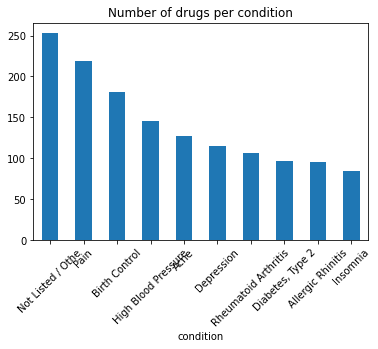

In [32]:
data_clean.groupby('condition')['drugName'].nunique().nlargest(10).plot(kind = 'bar')
plt.title('Number of drugs per condition')
plt.xticks(rotation = 45)
plt.show();

"Pain", "Birth Control" and "High Blood Pressure" have the highest number of drugs per condition.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

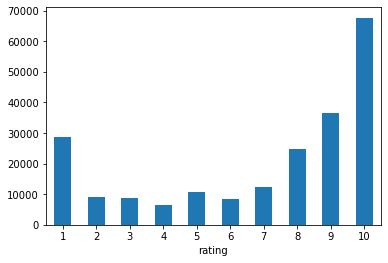

In [33]:
data_clean.groupby('rating').size().plot(kind = 'bar')
plt.xticks(rotation = 360)

In [22]:
avg_rating = data_clean['rating'].groupby(data_clean['drugName']).mean()

<AxesSubplot:>

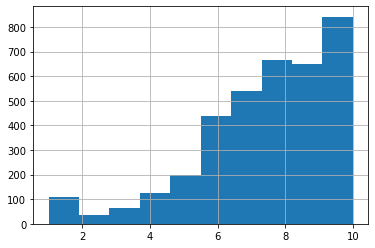

In [23]:
avg_rating.hist()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sertraline'),
  Text(1, 0, 'Citalopram'),
  Text(2, 0, 'Fluoxetine'),
  Text(3, 0, 'Celexa'),
  Text(4, 0, 'Prozac'),
  Text(5, 0, 'Bupropion'),
  Text(6, 0, 'Gabapentin'),
  Text(7, 0, 'Zoloft'),
  Text(8, 0, 'Amitriptyline'),
  Text(9, 0, 'Escitalopram')])

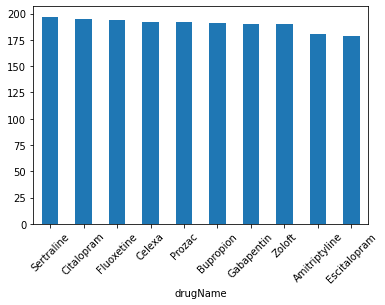

In [34]:
data_clean.groupby('drugName')['usefulCount'].nunique().nlargest(10).plot(kind = 'bar')
plt.xticks(rotation = 45)

# Data Pre-Processing

In [24]:
data_clean_top5cond = data_clean[(data_clean['condition'] == "Birth Control") | (data_clean['condition'] == "Depression") | 
                                  (data_clean['condition'] == "Pain") | (data_clean['condition'] == "Anxiety") |
                                 (data_clean['condition'] == "Acne")]
    

The top 5 conditions have been kept only for data pre-processing and modeling purpose.

In [25]:
    
data_clean_top5cond["review"] = data_clean_top5cond['review'].apply(lambda x: x.replace('"', ''))

C:\Users\imaraf\AppData\Local\Temp\ipykernel_28140\1735881624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_top5cond["review"] = data_clean_top5cond['review'].apply(lambda x: x.replace('"', ''))


In [26]:
data_clean_top5cond.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,I had been on the pill for many years. When my...,8,2016-12-08,1
11,75612,L-methylfolate,Depression,"I have taken anti-depressants for years, with ...",10,2017-03-09,54
14,98494,Nexplanon,Birth Control,Started Nexplanon 2 months ago because I have ...,3,2014-08-07,10


In [27]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data] 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\imaraf\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already

True

In [29]:
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
lemmatizer = WordNetLemmatizer()
def review_clean(raw_review):
    
    review = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters = re.sub('[^a-zA-Z]', ' ', review)
    words = letters.lower().split()
    words_clean = [i for i in words if not i in stop_words]
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_clean]
    return( ' '.join(words_lemmatized))
    

In [30]:
data_clean_top5cond["clean_review"] = data_clean_top5cond['review'].apply(review_clean)

C:\Users\imaraf\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\imaraf\AppData\Local\Temp\ipykernel_28140\3732368779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_top5cond["clean_review"] = data_clean_top5cond['review'].apply(review_clean)


The "review" column has been pre-processed. Stopwords have been removed. Lemmatization have been used as well.

In [31]:
data_clean_top5cond.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,clean_review
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10,first time using form birth control glad went ...
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,I had been on the pill for many years. When my...,8,2016-12-08,1,pill many year doctor changed rx chateal effec...
11,75612,L-methylfolate,Depression,"I have taken anti-depressants for years, with ...",10,2017-03-09,54,taken anti depressant year improvement mostly ...
14,98494,Nexplanon,Birth Control,Started Nexplanon 2 months ago because I have ...,3,2014-08-07,10,started nexplanon month ago minimal amount con...


In [32]:
X = np.array(data_clean_top5cond['clean_review'])
y = np.array(data_clean_top5cond['condition'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [35]:
import itertools
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')

    else: 
        print('Confusion Matrix without Normalization')
    
    thresh =cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment = "center",
                color = 'white' if cm[i,j]> thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Bag of Words Model

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words= 'english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

Bag of Words Model have been created to vectorize the input features. Most of the Machine Learning models can not work with raw text, texts need to be converted into numbers to use ML models.

# Modeling

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score,roc_auc_score

lr = OneVsRestClassifier(LogisticRegression(max_iter = 1000, random_state= 42))
lr.fit(count_train, y_train)
pred_lr = lr.predict(count_test)
score_lr = accuracy_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr,average= 'macro')
f1_lr = f1_score(y_test, pred_lr,average= 'macro')
print(score_lr,recall_lr,f1_lr)

0.9412915851272016 0.9094242341775922 0.9146585237849983


### This is the baseline model with 94% Accuracy.

In [40]:
pred_proba_lr = lr.predict_proba(count_test)
roc_lr = roc_auc_score(y_test, pred_proba_lr, multi_class="ovr", average= 'macro')
print(roc_lr)

0.992342841309321


### ROC-AUC score is 0.99

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_lr))

               precision    recall  f1-score   support

         Acne       0.96      0.91      0.93      1494
      Anxiety       0.86      0.80      0.83      1541
Birth Control       0.98      0.99      0.98      7673
   Depression       0.87      0.90      0.88      2461
         Pain       0.94      0.96      0.95      1650

     accuracy                           0.94     14819
    macro avg       0.92      0.91      0.91     14819
 weighted avg       0.94      0.94      0.94     14819



Precision: 0.92 \
Recall: 0.91 \
F1-score: 0.94

Confusion Matrix without Normalization


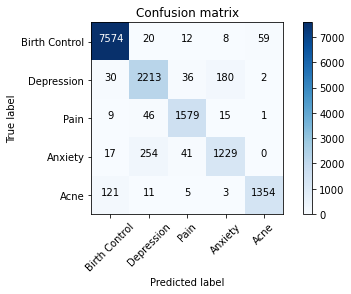

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
cm_lr = confusion_matrix(y_test,pred_lr, labels= ['Birth Control', 'Depression', 'Pain', "Anxiety", "Acne"])
plot_confusion_matrix(cm_lr, classes= ['Birth Control', 'Depression', 'Pain', "Anxiety", "Acne"])

# Naive Bayes

In [43]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred_mnb = mnb.predict(count_test)
score_mnb = accuracy_score(y_test, pred_mnb)
score_mnb

0.9217221135029354

### Naive Bayes model with 92% accuracy which is less than the baseline model Logistic Regression.

Confusion Matrix without Normalization


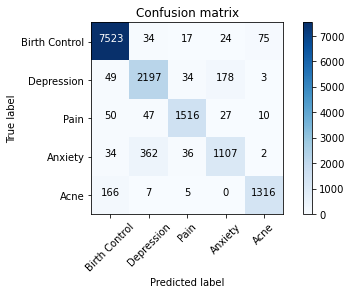

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
cm_mnb = confusion_matrix(y_test,pred_mnb, labels= ['Birth Control', 'Depression', 'Pain', "Anxiety", "Acne"])
plot_confusion_matrix(cm_mnb, classes= ['Birth Control', 'Depression', 'Pain', "Anxiety", "Acne"])


In [45]:
print(classification_report(y_test, pred_mnb))

               precision    recall  f1-score   support

         Acne       0.94      0.88      0.91      1494
      Anxiety       0.83      0.72      0.77      1541
Birth Control       0.96      0.98      0.97      7673
   Depression       0.83      0.89      0.86      2461
         Pain       0.94      0.92      0.93      1650

     accuracy                           0.92     14819
    macro avg       0.90      0.88      0.89     14819
 weighted avg       0.92      0.92      0.92     14819



Precision: 0.90 \
Recall: 0.88 \
F1-score: 0.89

In [46]:
pred_proba_mnb = mnb.predict_proba(count_test)
roc_mnb = roc_auc_score(y_test, pred_proba_mnb, multi_class="ovr", average= 'macro')
print(roc_mnb)

0.9872302372658819


### ROC-AUC score is 0.98

# XGBoost

In [47]:
import sys
!{sys.executable} -m pip install xgboost

In [48]:
from sklearn.preprocessing import OrdinalEncoder
y = y.reshape(-1,1)
X = X.reshape(-1,1)
y_encoded = OrdinalEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state= 42)



In [51]:
import xgboost as xgb
dtrain_clf = xgb.DMatrix(count_train, y_train, enable_categorical=True)

dtest_clf = xgb.DMatrix(count_test, y_test, enable_categorical=True)

In [52]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100)

xgb_classifier.fit(count_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [53]:
pred_xgb = xgb_classifier.predict(count_test)
score_xgb = accuracy_score(y_test, pred_xgb)
score_xgb

0.9306295971388083

### XGBoost model with 93% accuracy which is less than the baseline model Logistic Regression but better than Naive Bayes.

Confusion Matrix without Normalization


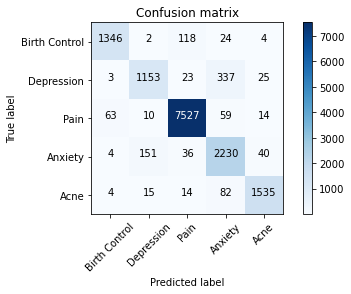

In [54]:
cm_xgb = confusion_matrix(y_test,pred_xgb)
cm_xgb
plot_confusion_matrix(cm_xgb,classes= ['Birth Control', 'Depression', 'Pain', "Anxiety", "Acne"])

In [55]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      1494
         1.0       0.87      0.75      0.80      1541
         2.0       0.98      0.98      0.98      7673
         3.0       0.82      0.91      0.86      2461
         4.0       0.95      0.93      0.94      1650

    accuracy                           0.93     14819
   macro avg       0.91      0.89      0.90     14819
weighted avg       0.93      0.93      0.93     14819



Precision: 0.91 \
Recall: 0.89 \
F1-score: 0.90

In [56]:
pred_proba_xgb = mnb.predict_proba(count_test)
roc_xgb = roc_auc_score(y_test, pred_proba_xgb, multi_class="ovr", average= 'macro')
print(roc_xgb)

0.9872302372658819


### ROC-AUC score is 0.98

# Model Evaluation

### Based on the Accuracy metric, Logistic Regression is the best model to predict patient's condition based on drug review. For multi-class classification problem, Accuracy is the best metric.

## Next Steps

1. TF-IDF,  Word2vec, GloVe 

2. Few Shot Learning techniques (FastText, SetFit, etc.) 

3. Zero Shot Learning techniques
